# Cleaning data with Pandas

# A. Find Missing Values

In [2]:
# import library
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [6]:
df.describe()

,PID,ST_NUM
count,8.000000e+00,7.000000
mean,1.000050e+08,191.428571
std,2.927700e+03,39.080503
min,1.000010e+08,104.000000
25%,1.000028e+08,199.000000
50%,1.000050e+08,203.000000
75%,1.000072e+08,210.000000
max,1.000090e+08,215.000000


In [4]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


# 1. Standard Missing Values

In [7]:
# fokus ke kolom ST_NUM
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [10]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

# 2. Non-Standard Missing Values

In [12]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [14]:
# fokus ke kolom NUM_BEDROOMS
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [15]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [16]:
# SOLUSI
# tampung karakter aneh tdi ke dalam list
missing_values = ['na', 'n/a', '--']

In [17]:
# input parameter baru
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)

In [18]:
# baca df baru, hore karakter aneh jdi kebaca missing values
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [20]:
# check 
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

# 3. Unexpected missing values

In [21]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [22]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [23]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [27]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt += 1

In [28]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [29]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [30]:
# Kesimpulan Missing Values
# cek total missing values secara general
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [31]:
# cek total missing values secara general
# tipe return boolean
df.isnull().sum().any()

True

In [35]:
# cek total missing values secara general
# tipe return numeric
df.isnull().sum().sum()

12

# B. Clean Missing Values

# 1. Replacing

In [36]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [39]:
# ubah NaN jdi 125
df['ST_NUM'].fillna(125, inplace=True)

In [40]:
# baca perubahannya
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [48]:
# cara ubah berbasis lokasi pake loc
df.loc[3:6,'OWN_OCCUPIED'] = 'Y'
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
# replace dgn nilai median

In [51]:
# baca data dahulu
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [53]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [54]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [55]:
# baca lagi datanya
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


# Analyzing Obesity in England

In [56]:
# baca data excelnya
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [57]:
# baca sheetnya
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [58]:
# baca salah satu sheetnya saja, cth 7.2
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [59]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [ ]:
# Task to do
# 1. ubah kolom unnamed
# 2. hilangkan baris NaN
# 3. Set plotnya

In [63]:
# 1. ubah kolom unnnamed
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [64]:
# 2. hilangkan baris NaN
data_age.dropna(inplace=True)

In [65]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [66]:
# 3. Set plot
data_age.set_index('Year', inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

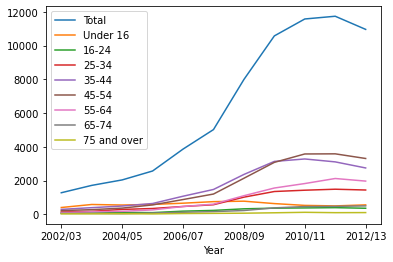

In [67]:
# bikin plot
data_age.plot()

In [71]:
# hapus plot untuk total, karena ga bermakna
data_age_nototal = data_age.drop('Total', axis=1)
data_age_nototal

,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,
2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

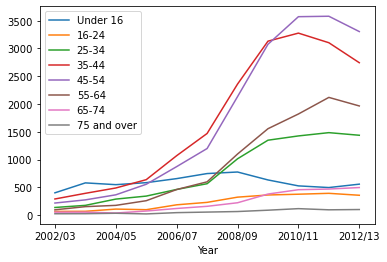

In [72]:
data_age_nototal.plot()

<AxesSubplot:xlabel='Year'>

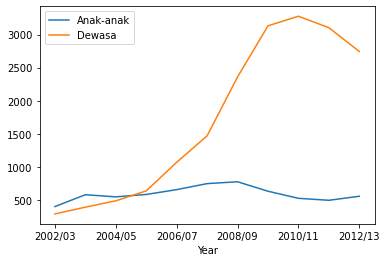

In [75]:
# tampilin fokus ke data anak-anak
data_age['Under 16'].plot(label='Anak-anak', legend= True)
data_age['35-44'].plot(label='Dewasa', legend=True)

# Time Series Manipulation

In [76]:
from datetime import datetime

In [77]:
# buat timestamps sendiri
data_rng = pd.date_range(start= '1/01/2020', end='1/08/2020', freq='H')

In [78]:
data_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [80]:
# buat dataframe yg ada timestamps tdi
df = pd.DataFrame(data_rng, columns=['date'])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [ ]:
# tambahin kolom baru yaitu data yang berisi nomor random

In [82]:
df['data'] = np.random.randint(0, 100, size=(len(data_rng)))

In [85]:
df.head()

,date,data
0,2020-01-01 00:00:00,61
1,2020-01-01 01:00:00,90
2,2020-01-01 02:00:00,89
3,2020-01-01 03:00:00,27
4,2020-01-01 04:00:00,82


In [92]:
# set index agar si date jdi index
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
# hasil dibawah kurang sesuai, skip saja ya

,date,data,datetime
datetime,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,61,2020-01-01 00:00:00
2020-01-01 01:00:00,2020-01-01 01:00:00,90,2020-01-01 01:00:00
2020-01-01 02:00:00,2020-01-01 02:00:00,89,2020-01-01 02:00:00
2020-01-01 03:00:00,2020-01-01 03:00:00,27,2020-01-01 03:00:00
2020-01-01 04:00:00,2020-01-01 04:00:00,82,2020-01-01 04:00:00
...,...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,29,2020-01-07 20:00:00
2020-01-07 21:00:00,2020-01-07 21:00:00,38,2020-01-07 21:00:00
2020-01-07 22:00:00,2020-01-07 22:00:00,43,2020-01-07 22:00:00


In [93]:
df.drop(['date', 'datetime'], axis =1, inplace= True)
df

,data
datetime,
2020-01-01 00:00:00,61
2020-01-01 01:00:00,90
2020-01-01 02:00:00,89
2020-01-01 03:00:00,27
2020-01-01 04:00:00,82
...,...
2020-01-07 20:00:00,29
2020-01-07 21:00:00,38
2020-01-07 22:00:00,43


In [95]:
# ubah timestamps jadi list of string
string_date_rng = [str(x) for x in data_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [96]:
# ubah string jdi timestamps
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=  True)
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [98]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [99]:
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

In [100]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [101]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [104]:
# cara pertama
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,10
2020-01-02 01:00:00,74
2020-01-02 02:00:00,95
2020-01-02 03:00:00,1
2020-01-02 04:00:00,68
2020-01-02 05:00:00,26
2020-01-02 06:00:00,54
2020-01-02 07:00:00,56
2020-01-02 08:00:00,75


In [105]:
# cara kedua
df['2020-01-03']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4848\186698106.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,71
2020-01-03 01:00:00,41
2020-01-03 02:00:00,33
2020-01-03 03:00:00,42
2020-01-03 04:00:00,29
2020-01-03 05:00:00,55
2020-01-03 06:00:00,32
2020-01-03 07:00:00,49
2020-01-03 08:00:00,72


In [106]:
df['2020-01-04': '2020-01-06']

,data
datetime,
2020-01-04 00:00:00,77
2020-01-04 01:00:00,97
2020-01-04 02:00:00,39
2020-01-04 03:00:00,69
2020-01-04 04:00:00,2
...,...
2020-01-06 19:00:00,2
2020-01-06 20:00:00,49
2020-01-06 21:00:00,75


In [109]:
df.resample('D').mean()

,data
datetime,
2020-01-01,61.416667
2020-01-02,51.375000
2020-01-03,57.458333
2020-01-04,45.958333
2020-01-05,40.250000
2020-01-06,50.791667
2020-01-07,40.625000
2020-01-08,36.000000


In [110]:
df['rolling_sum'] = df.rolling(3).sum()
df

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,61,NaN
2020-01-01 01:00:00,90,NaN
2020-01-01 02:00:00,89,240.0
2020-01-01 03:00:00,27,206.0
2020-01-01 04:00:00,82,198.0
...,...,...
2020-01-07 20:00:00,29,100.0
2020-01-07 21:00:00,38,74.0
2020-01-07 22:00:00,43,110.0


In [111]:
df

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,61,NaN
2020-01-01 01:00:00,90,NaN
2020-01-01 02:00:00,89,240.0
2020-01-01 03:00:00,27,206.0
2020-01-01 04:00:00,82,198.0
...,...,...
2020-01-07 20:00:00,29,100.0
2020-01-07 21:00:00,38,74.0
2020-01-07 22:00:00,43,110.0


In [113]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,61,NaN,240.0
2020-01-01 01:00:00,90,NaN,240.0
2020-01-01 02:00:00,89,240.0,240.0
2020-01-01 03:00:00,27,206.0,206.0
2020-01-01 04:00:00,82,198.0,198.0
...,...,...,...
2020-01-07 20:00:00,29,100.0,100.0
2020-01-07 21:00:00,38,74.0,74.0
2020-01-07 22:00:00,43,110.0,110.0


# Time Series on Dataset

In [114]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [115]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [116]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [117]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [118]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [ ]:
# cara lain, caranya cepat
# opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [130]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

opsd_daily

AttributeError: 'Index' object has no attribute 'year'

In [126]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [131]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Name: 2017-08-10, dtype: float64

In [133]:
opsd_daily.loc['2014-01-20': '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-01-20,1590.687,78.647,6.371,85.018
2014-01-21,1624.806,15.643,5.835,21.478
2014-01-22,1625.155,60.259,11.992,72.251


In [138]:
opsd_daily.loc['2012-02']

KeyError: '2012-02'

In [141]:
opsd_daily['Comsumption'].plot(linewidth=0.5);

KeyError: 'Comsumption'

In [142]:
opsd_daily['Comsumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9));

KeyError: 'Comsumption'

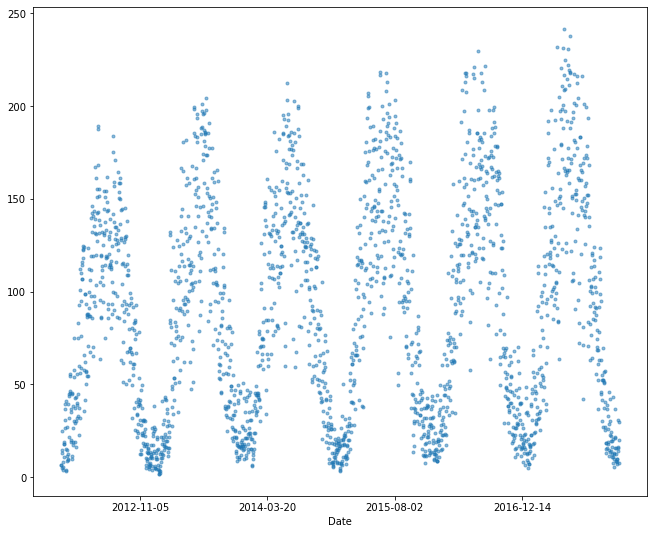

In [143]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9));

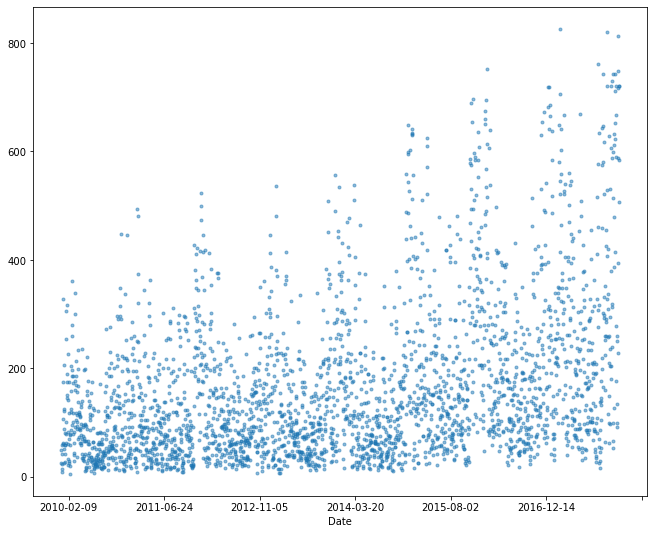

In [144]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9));

In [147]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWh)');

KeyError: '2017'

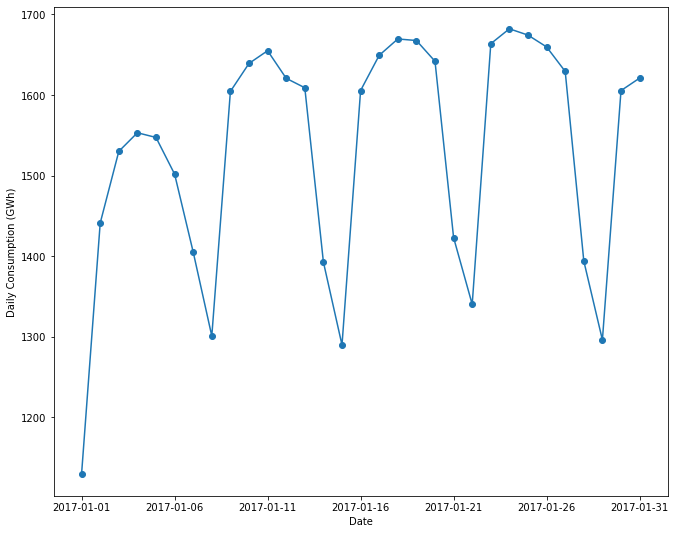

In [148]:
ax = opsd_daily.loc['2017-01': '2017-02','Consumption'].plot(marker='o', linestyle='-', figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWh)');

In [149]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

KeyError: 'Month'

In [150]:
opsd_daily.boxplot(column=['Solar'], by='Month')

KeyError: 'Month'

In [151]:
opsd_daily.boxplot(column=['Wind'], by='Month')

KeyError: 'Month'

In [152]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

KeyError: 'Weekday'

In [153]:
data_columns = ['Consumption','Wind','Solar','Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [154]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383


NameError: name 'opsd_weekly_mean' is not defined

In [155]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5. figsize=(11,9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle ='-', figsize=(11,9))

SyntaxError: invalid syntax (1973289123.py, line 3)